# State Value Function

We want to calculate $V_{\pi}(s)$ (the state-value-function given a policy)
![mdp.png](mdp.png)

# Policy Evaluation by Dynamic Programming (page 16)

In [1]:
import numpy as np

policy=np.array([[0.3, 0.2, 0.5], [0.5, 0.4, 0.1], [0.8, 0.1, 0.1]])
rewards=np.array([10., 2., 3.])

state_value_function=np.array([0 for i in range(3)])

for i in range(20):
    print(state_value_function)
    state_value_function=rewards+0.1*(np.matmul(policy, state_value_function))
print(state_value_function)

[0 0 0]
[ 10.   2.   3.]
[ 10.49   2.61   3.85]
[ 10.5594   2.6674   3.9038]
[ 10.56532    2.673704   3.910464]
[ 10.56595688   2.6743188    3.91106728]
[ 10.56601845   2.67438127   3.91113041]
[ 10.5660247    2.67438748   3.91113659]
[ 10.56602532   2.6743881    3.91113722]
[ 10.56602538   2.67438816   3.91113728]
[ 10.56602539   2.67438817   3.91113729]
[ 10.56602539   2.67438817   3.91113729]
[ 10.56602539   2.67438817   3.91113729]
[ 10.56602539   2.67438817   3.91113729]
[ 10.56602539   2.67438817   3.91113729]
[ 10.56602539   2.67438817   3.91113729]
[ 10.56602539   2.67438817   3.91113729]
[ 10.56602539   2.67438817   3.91113729]
[ 10.56602539   2.67438817   3.91113729]
[ 10.56602539   2.67438817   3.91113729]
[ 10.56602539   2.67438817   3.91113729]


# Policy Evaluation by Linear Programming (page 15)

The state-value-function can be directly solved through linear programming (as shown on page 15):


In [2]:
solution=np.matmul(np.linalg.inv(np.eye(3)-0.1*policy), rewards)
print(solution)

[ 10.56602539   2.67438817   3.91113729]


The result stays the same.

# Monte Carlo Policy Evaluation (page 20)


Monte Carlo Policy Evaluation can also be used, whereby sampling is used to get to the same result

In [3]:
import random
from collections import defaultdict
reward_counter=np.array([0., 0., 0.])
visit_counter=np.array([0., 0., 0.])

def gt(rewardlist, gamma=0.1):
    '''
    Function to calculate the total discounted reward
    >>> gt([10, 2, 3], gamma=0.1)
    10.23
    '''
    summe=0
    for i, value in enumerate(rewardlist):
        summe+=(gamma**i)*value
    return summe


for i in range(400):
    start_state=random.randint(0, 2)
    next_state=start_state
    rewardlist=[]
    occurence=defaultdict(list) 
    for i in range(250):
        rewardlist.append(rewards[next_state]) 
        occurence[next_state].append(len(rewardlist)-1) 
        action=np.random.choice(np.arange(0, 3), p=policy[next_state]) 
        next_state=action

    for state in occurence: 
        for value in occurence[state]: 
            rew=gt(rewardlist[value:]) 
            reward_counter[state]+=rew 
            visit_counter[state]+=1 
            

print(reward_counter/visit_counter)

[ 10.56210462   2.67366518   3.90852797]


As can be seen the result is nearly the same as the state-value-function calculated above.

# Policy Optimization by Q-Learning (page 26)

This code solves a very easy problem: using the rewards it calculated the optimal action-value-function.

It samples a state-action pair randomly, so that all state-action pairs can be seen.

In [4]:
q_table=np.zeros((3, 3)) 
for i in range(1001): 
    state=random.randint(0, 2) 
    action=random.randint(0, 2) 
    next_state=action
    reward=rewards[next_state] 
    next_q=max(q_table[next_state]) 
    q_table[state, action]=q_table[state, action]+1*(reward+0.1*(next_q)-q_table[state, action]) #Q-Table update
    if i%100==0:
        print(q_table)

[[ 0.  0.  0.]
 [ 0.  2.  0.]
 [ 0.  0.  0.]]
[[ 11.11111104   3.11111104   4.11111104]
 [ 11.1111104    3.11111104   4.11111104]
 [ 11.1111104    3.11111104   4.11111104]]
[[ 11.11111111   3.11111111   4.11111111]
 [ 11.11111111   3.11111111   4.11111111]
 [ 11.11111111   3.11111111   4.11111111]]
[[ 11.11111111   3.11111111   4.11111111]
 [ 11.11111111   3.11111111   4.11111111]
 [ 11.11111111   3.11111111   4.11111111]]
[[ 11.11111111   3.11111111   4.11111111]
 [ 11.11111111   3.11111111   4.11111111]
 [ 11.11111111   3.11111111   4.11111111]]
[[ 11.11111111   3.11111111   4.11111111]
 [ 11.11111111   3.11111111   4.11111111]
 [ 11.11111111   3.11111111   4.11111111]]
[[ 11.11111111   3.11111111   4.11111111]
 [ 11.11111111   3.11111111   4.11111111]
 [ 11.11111111   3.11111111   4.11111111]]
[[ 11.11111111   3.11111111   4.11111111]
 [ 11.11111111   3.11111111   4.11111111]
 [ 11.11111111   3.11111111   4.11111111]]
[[ 11.11111111   3.11111111   4.11111111]
 [ 11.11111111   3.1111

## Score Function Gradient Estimator (page 32)

[[ 0.33333334  0.33333334  0.33333334]
 [ 0.33333334  0.33333334  0.33333334]
 [ 0.33333334  0.33333334  0.33333334]]
[1.0, 0.29999999999999999, 1.0, 1.0, 0.29999999999999999, 0.29999999999999999, 0.20000000000000001, 1.0, 0.29999999999999999, 0.20000000000000001, 0.20000000000000001, 1.0, 0.20000000000000001, 0.29999999999999999, 1.0, 0.20000000000000001, 1.0, 0.29999999999999999, 0.20000000000000001, 0.29999999999999999, 0.20000000000000001, 0.20000000000000001, 0.20000000000000001, 1.0, 0.20000000000000001, 1.0, 0.20000000000000001, 0.29999999999999999, 0.29999999999999999, 0.29999999999999999, 0.20000000000000001, 0.20000000000000001, 1.0, 1.0, 0.20000000000000001, 0.29999999999999999, 0.20000000000000001, 0.20000000000000001, 1.0, 0.29999999999999999]


/home/michael/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:32: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/home/michael/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:12: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


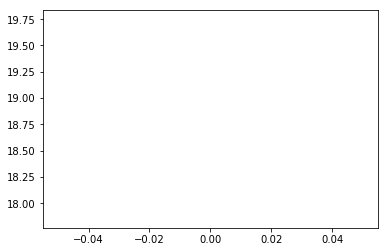

[[ 0.32680154  0.32811567  0.34508276]
 [ 0.36733317  0.31970754  0.31295925]
 [ 0.31931016  0.34994164  0.3307482 ]]
[1.0, 0.29999999999999999, 0.29999999999999999, 1.0, 0.20000000000000001, 1.0, 0.20000000000000001, 0.20000000000000001, 0.29999999999999999, 1.0, 0.20000000000000001, 0.29999999999999999, 1.0, 0.20000000000000001, 0.20000000000000001, 0.29999999999999999, 0.20000000000000001, 1.0, 0.29999999999999999, 0.29999999999999999, 0.20000000000000001, 0.29999999999999999, 0.29999999999999999, 1.0, 1.0, 0.20000000000000001, 0.20000000000000001, 1.0, 1.0, 0.20000000000000001, 1.0, 0.20000000000000001, 1.0, 0.20000000000000001, 1.0, 0.20000000000000001, 0.20000000000000001, 1.0, 1.0, 0.20000000000000001]


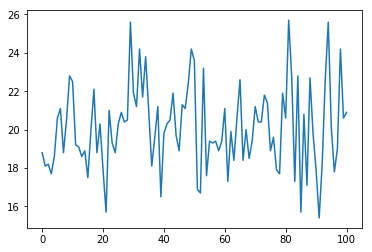

[[ 0.3540906   0.31283155  0.33307791]
 [ 0.42975247  0.3084788   0.2617687 ]
 [ 0.3143037   0.37501335  0.31068298]]
[1.0, 0.29999999999999999, 0.20000000000000001, 0.20000000000000001, 0.20000000000000001, 0.29999999999999999, 1.0, 1.0, 0.20000000000000001, 1.0, 1.0, 0.20000000000000001, 0.20000000000000001, 0.20000000000000001, 0.20000000000000001, 1.0, 0.20000000000000001, 0.20000000000000001, 0.29999999999999999, 0.29999999999999999, 1.0, 0.20000000000000001, 0.29999999999999999, 0.29999999999999999, 0.29999999999999999, 0.29999999999999999, 1.0, 1.0, 0.20000000000000001, 1.0, 1.0, 1.0, 0.20000000000000001, 0.29999999999999999, 1.0, 0.20000000000000001, 0.29999999999999999, 1.0, 0.29999999999999999, 1.0]


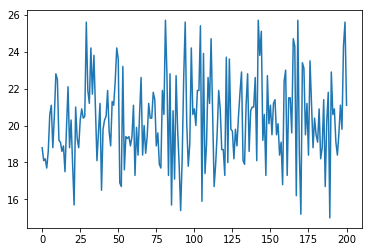

[[ 0.42799121  0.30432937  0.26767942]
 [ 0.44641352  0.33469039  0.21889608]
 [ 0.32521573  0.37390515  0.30087912]]
[1.0, 1.0, 0.20000000000000001, 1.0, 0.20000000000000001, 0.20000000000000001, 0.20000000000000001, 0.20000000000000001, 1.0, 0.29999999999999999, 0.29999999999999999, 0.20000000000000001, 1.0, 0.29999999999999999, 0.20000000000000001, 0.20000000000000001, 1.0, 0.20000000000000001, 0.29999999999999999, 1.0, 1.0, 1.0, 0.29999999999999999, 1.0, 1.0, 1.0, 0.20000000000000001, 1.0, 1.0, 1.0, 0.20000000000000001, 0.29999999999999999, 1.0, 1.0, 1.0, 1.0, 0.20000000000000001, 1.0, 0.20000000000000001, 1.0]


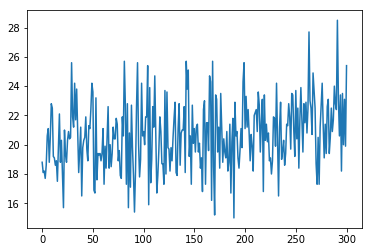

[[ 0.52804208  0.29131937  0.18063852]
 [ 0.45450178  0.3596988   0.18579938]
 [ 0.36445054  0.34993553  0.28561389]]
[0.29999999999999999, 0.29999999999999999, 0.20000000000000001, 0.20000000000000001, 1.0, 0.20000000000000001, 0.20000000000000001, 0.20000000000000001, 1.0, 1.0, 0.20000000000000001, 1.0, 1.0, 1.0, 1.0, 0.29999999999999999, 0.29999999999999999, 1.0, 1.0, 1.0, 1.0, 1.0, 0.20000000000000001, 0.20000000000000001, 1.0, 0.29999999999999999, 1.0, 1.0, 1.0, 0.20000000000000001, 1.0, 1.0, 1.0, 0.20000000000000001, 0.20000000000000001, 0.29999999999999999, 0.29999999999999999, 0.20000000000000001, 0.29999999999999999, 0.29999999999999999]


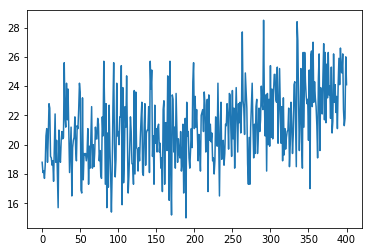

[[ 0.62805432  0.2554931   0.11645254]
 [ 0.50134814  0.35585707  0.14279476]
 [ 0.40943906  0.32544768  0.26511326]]
[0.20000000000000001, 0.20000000000000001, 0.29999999999999999, 0.29999999999999999, 0.29999999999999999, 1.0, 0.29999999999999999, 1.0, 1.0, 1.0, 0.20000000000000001, 0.20000000000000001, 0.29999999999999999, 0.20000000000000001, 1.0, 1.0, 0.20000000000000001, 1.0, 0.20000000000000001, 0.20000000000000001, 1.0, 1.0, 1.0, 0.20000000000000001, 0.20000000000000001, 0.20000000000000001, 1.0, 1.0, 1.0, 1.0, 1.0, 0.29999999999999999, 0.20000000000000001, 1.0, 0.20000000000000001, 0.29999999999999999, 0.20000000000000001, 1.0, 1.0, 0.20000000000000001]


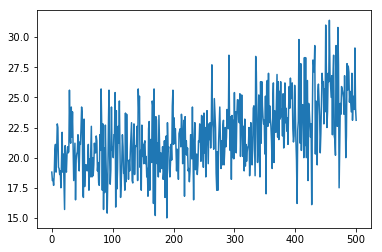

[[ 0.72205985  0.20754305  0.07039706]
 [ 0.57033628  0.32497829  0.10468546]
 [ 0.46517205  0.27704656  0.25778139]]
[1.0, 1.0, 0.20000000000000001, 0.20000000000000001, 0.20000000000000001, 1.0, 1.0, 0.20000000000000001, 1.0, 1.0, 1.0, 1.0, 1.0, 0.29999999999999999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.29999999999999999, 0.20000000000000001, 0.29999999999999999, 1.0, 1.0, 1.0, 0.20000000000000001, 0.20000000000000001, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.20000000000000001, 0.20000000000000001, 1.0, 1.0, 1.0, 0.29999999999999999]


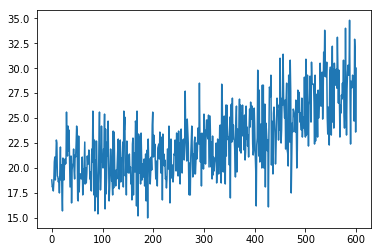

[[ 0.82894099  0.12872896  0.04233009]
 [ 0.66256326  0.26950404  0.06793268]
 [ 0.52891248  0.21973889  0.25134858]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.20000000000000001, 1.0, 1.0, 1.0, 0.20000000000000001, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.20000000000000001, 1.0, 1.0, 1.0, 1.0, 0.20000000000000001, 1.0, 1.0, 1.0, 1.0, 1.0, 0.20000000000000001]


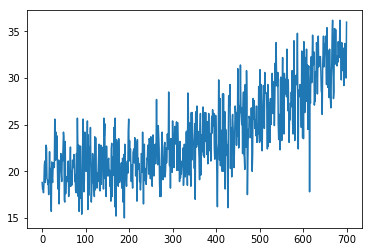

[[ 0.90362138  0.06930454  0.02707408]
 [ 0.72181034  0.23547594  0.04271376]
 [ 0.59182799  0.15505213  0.25311986]]
[0.20000000000000001, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.20000000000000001, 1.0, 1.0, 1.0, 1.0, 0.20000000000000001, 1.0, 1.0, 1.0, 1.0, 1.0, 0.29999999999999999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.20000000000000001, 0.20000000000000001, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


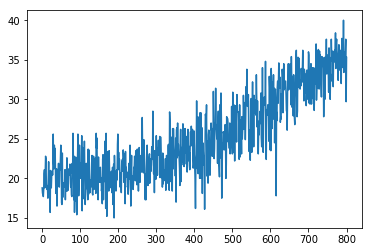

[[ 0.94878125  0.03440566  0.01681308]
 [ 0.76190382  0.21325885  0.0248373 ]
 [ 0.65258765  0.10426898  0.24314332]]
[0.29999999999999999, 0.29999999999999999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


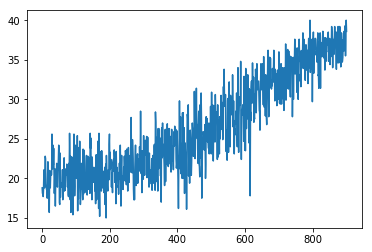

[[ 0.97550857  0.01457359  0.00991781]
 [ 0.79041797  0.19574983  0.01383221]
 [ 0.71620172  0.06626815  0.21753012]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


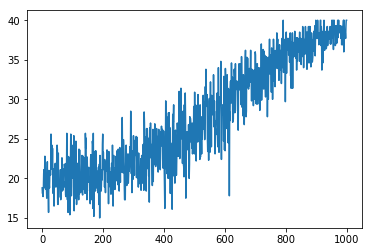

[[ 0.99069434  0.00457396  0.00473166]
 [ 0.81846875  0.17392559  0.00760567]
 [ 0.77236676  0.04076057  0.18687268]]
[0.20000000000000001, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.20000000000000001, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


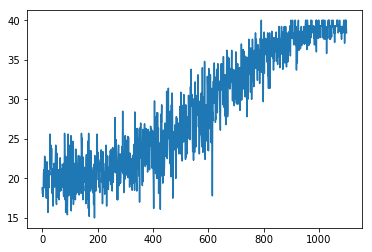

[[ 0.99648988  0.00137913  0.00213101]
 [ 0.84754509  0.14836775  0.00408713]
 [ 0.81961256  0.02393399  0.15645343]]
[0.20000000000000001, 0.20000000000000001, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


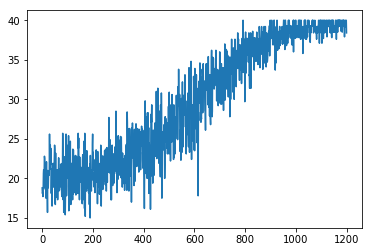

[[  9.98657048e-01   4.03044483e-04   9.39933991e-04]
 [  8.71579468e-01   1.26239270e-01   2.18125014e-03]
 [  8.58981609e-01   1.37129305e-02   1.27305478e-01]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.29999999999999999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


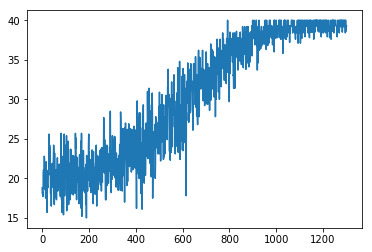

[[  9.99458313e-01   1.19475488e-04   4.22195299e-04]
 [  8.91218603e-01   1.07620910e-01   1.16046856e-03]
 [  8.92406166e-01   7.64003629e-03   9.99537781e-02]]
[0.29999999999999999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


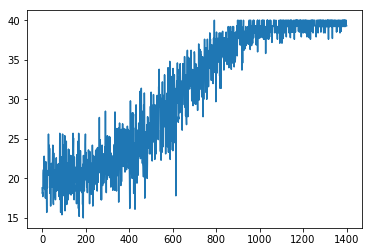

[[  9.99775410e-01   3.53681062e-05   1.89243161e-04]
 [  9.09292996e-01   9.00961235e-02   6.10858260e-04]
 [  9.19210911e-01   4.21296759e-03   7.65761137e-02]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


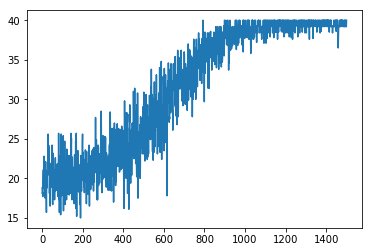

[[  9.99904811e-01   1.04425126e-05   8.47214033e-05]
 [  9.26141560e-01   7.35412836e-02   3.17137805e-04]
 [  9.38161910e-01   2.32915301e-03   5.95089197e-02]]
[0.20000000000000001, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


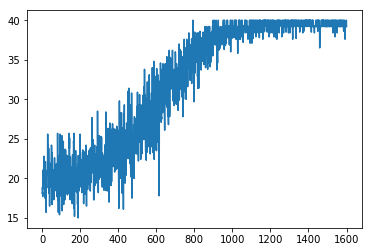

[[  9.99959111e-01   3.07686969e-06   3.78189579e-05]
 [  9.36968029e-01   6.28640652e-02   1.67894526e-04]
 [  9.50752258e-01   1.30521704e-03   4.79425415e-02]]
[0.29999999999999999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


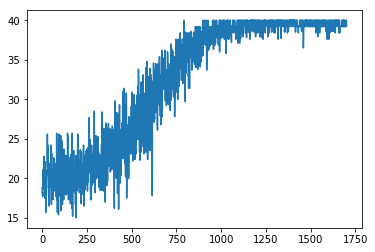

[[  9.99982238e-01   9.05212687e-07   1.68367151e-05]
 [  9.45533156e-01   5.43775372e-02   8.92909738e-05]
 [  9.60396409e-01   7.32210581e-04   3.88713628e-02]]
[0.20000000000000001, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


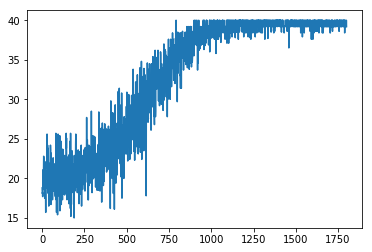

[[  9.99992251e-01   2.66137732e-07   7.48670573e-06]
 [  9.52935994e-01   4.70165424e-02   4.74450389e-05]
 [  9.68489885e-01   4.07573301e-04   3.11025456e-02]]
[0.29999999999999999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


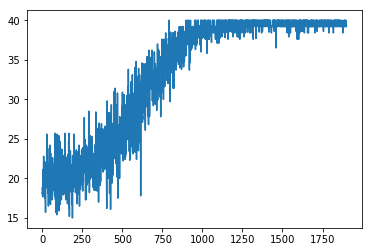

[[  9.99996603e-01   7.82240264e-08   3.32734726e-06]
 [  9.59577501e-01   4.03973982e-02   2.51193105e-05]
 [  9.75410402e-01   2.24293341e-04   2.43652966e-02]]
[0.20000000000000001, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


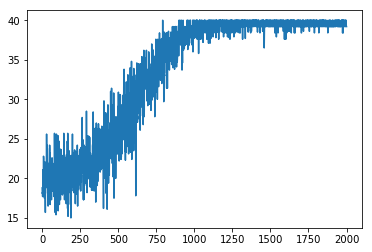

[[  9.99998510e-01   2.29891590e-08   1.47844867e-06]
 [  9.65034068e-01   3.49525996e-02   1.33369713e-05]
 [  9.80989039e-01   1.22691112e-04   1.88882407e-02]]
[0.20000000000000001, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


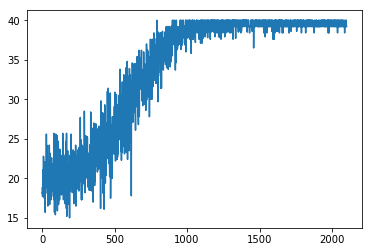

[[  9.99999344e-01   6.75586076e-09   6.56851967e-07]
 [  9.68904793e-01   3.10880225e-02   7.17359535e-06]
 [  9.85429466e-01   6.67528147e-05   1.45037835e-02]]
[0.20000000000000001, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


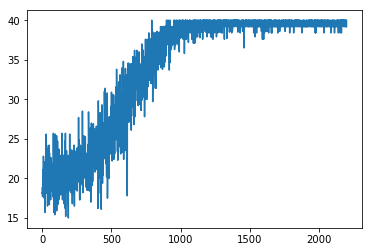

[[  9.99999702e-01   1.98535455e-09   2.91822147e-07]
 [  9.71501291e-01   2.84948014e-02   3.91432059e-06]
 [  9.88867104e-01   3.62327555e-05   1.10966489e-02]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


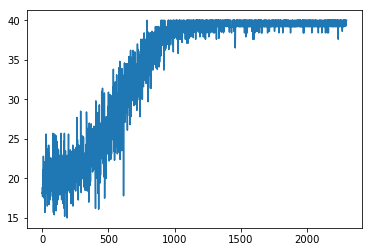

[[  9.99999881e-01   5.83438964e-10   1.29648910e-07]
 [  9.73586977e-01   2.64108796e-02   2.14725651e-06]
 [  9.91472423e-01   1.96785095e-05   8.50788411e-03]]
[0.20000000000000001, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


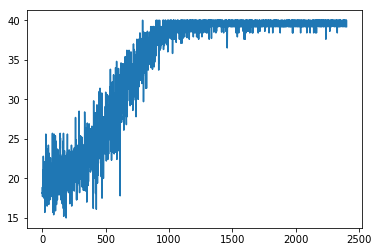

[[  9.99999940e-01   1.71456002e-10   5.75982781e-08]
 [  9.75607395e-01   2.43914332e-02   1.17574575e-06]
 [  9.93497312e-01   1.06590287e-05   6.49203127e-03]]
[0.20000000000000001, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


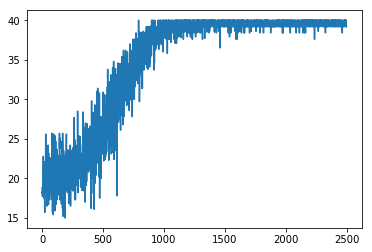

[[  1.00000000e+00   5.03860113e-11   2.55887880e-08]
 [  9.77513075e-01   2.24863011e-02   6.43175781e-07]
 [  9.95060563e-01   5.76048660e-06   4.93370648e-03]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


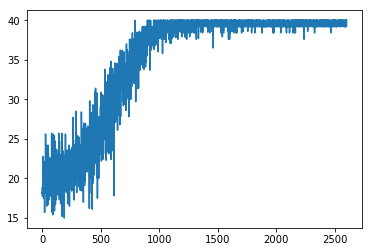

[[  1.00000000e+00   1.48070046e-11   1.13681535e-08]
 [  9.78919387e-01   2.10802723e-02   3.54696596e-07]
 [  9.96260881e-01   3.10698965e-06   3.73601029e-03]]
[0.20000000000000001, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


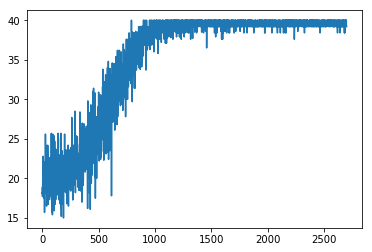

[[  1.00000000e+00   4.35135478e-12   5.05045072e-09]
 [  9.79782701e-01   2.02171076e-02   1.97789134e-07]
 [  9.97175992e-01   1.67357109e-06   2.82236119e-03]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


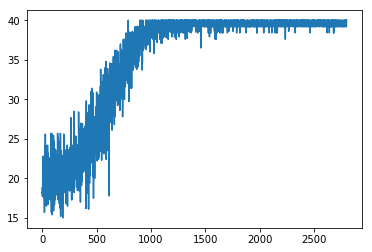

[[  1.00000000e+00   1.27873851e-12   2.24372854e-09]
 [  9.80695903e-01   1.93039812e-02   1.10052731e-07]
 [  9.97846603e-01   9.05644526e-07   2.15251069e-03]]
[0.29999999999999999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


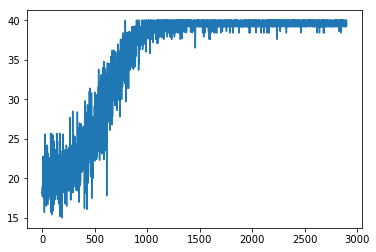

[[  1.00000000e+00   3.75784609e-13   9.96805749e-10]
 [  9.81646419e-01   1.83535479e-02   6.11053679e-08]
 [  9.98351991e-01   4.90920968e-07   1.64751557e-03]]
[0.29999999999999999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


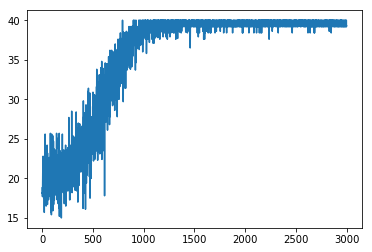

[[  1.00000000e+00   1.10432327e-13   4.42843956e-10]
 [  9.82418597e-01   1.75813455e-02   3.40523982e-08]
 [  9.98740017e-01   2.65960693e-07   1.25970773e-03]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


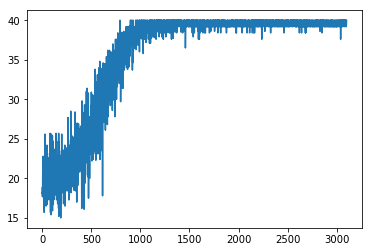

[[  1.00000000e+00   3.24528985e-14   1.96739208e-10]
 [  9.83003795e-01   1.69961713e-02   1.90614546e-08]
 [  9.99037385e-01   1.44028064e-07   9.62491613e-04]]
[0.20000000000000001, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


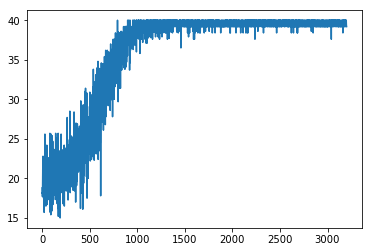

[[  1.00000000e+00   9.53697689e-15   8.74039591e-11]
 [  9.83331323e-01   1.66686904e-02   1.07457394e-08]
 [  9.99264836e-01   7.79763241e-08   7.35061883e-04]]
[0.29999999999999999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


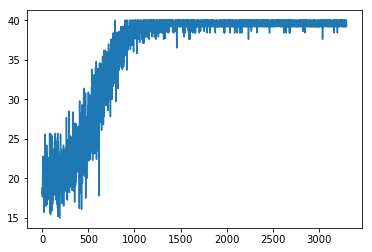

[[  1.00000000e+00   2.80264419e-15   3.88303521e-11]
 [  9.83791649e-01   1.62083674e-02   6.03238393e-09]
 [  9.99438822e-01   4.22055777e-08   5.61124529e-04]]
[0.20000000000000001, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


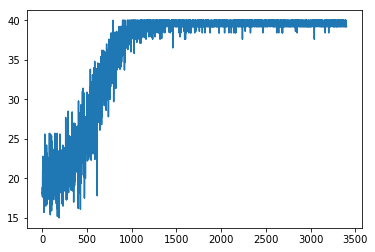

[[  1.00000000e+00   8.23616880e-16   1.72508900e-11]
 [  9.84358668e-01   1.56413447e-02   3.37374972e-09]
 [  9.99571800e-01   2.28396519e-08   4.28189640e-04]]
[0.29999999999999999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


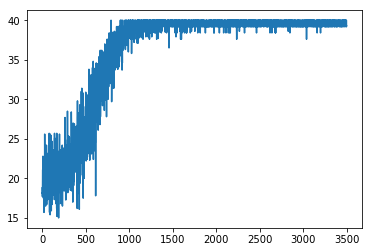

[[  1.00000000e+00   2.42037388e-16   7.66393372e-12]
 [  9.84889805e-01   1.51101779e-02   1.88780747e-09]
 [  9.99673307e-01   1.23579778e-08   3.26665206e-04]]
[0.20000000000000001, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


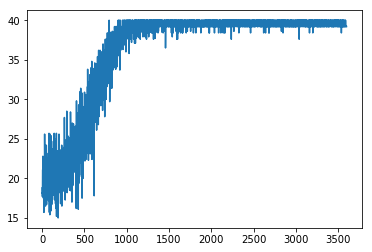

[[  1.00000000e+00   7.11278580e-17   3.40480248e-12]
 [  9.85452116e-01   1.45478584e-02   1.05457854e-09]
 [  9.99750853e-01   6.68575106e-09   2.49156990e-04]]
[0.29999999999999999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


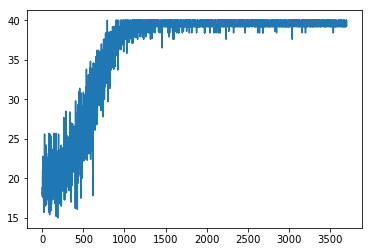

[[  1.00000000e+00   2.09031568e-17   1.51262791e-12]
 [  9.86107647e-01   1.38923479e-02   5.86739379e-10]
 [  9.99809980e-01   3.61674291e-09   1.90008694e-04]]
[0.29999999999999999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


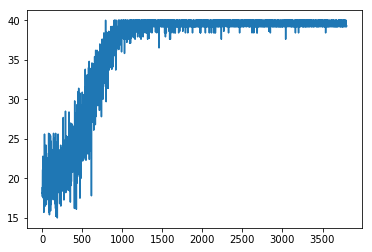

[[  1.00000000e+00   6.14342491e-18   6.72004715e-13]
 [  9.86830950e-01   1.31690614e-02   3.25255128e-10]
 [  9.99855101e-01   1.95633199e-09   1.44880061e-04]]
[0.29999999999999999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


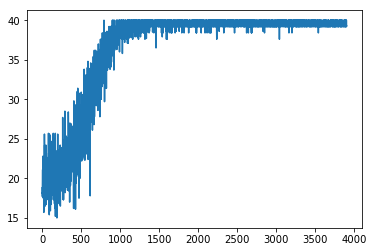

[[  1.00000000e+00   1.80554875e-18   2.98546859e-13]
 [  9.87601936e-01   1.23980874e-02   1.79689916e-10]
 [  9.99889553e-01   1.05818798e-09   1.10464345e-04]]
[0.29999999999999999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


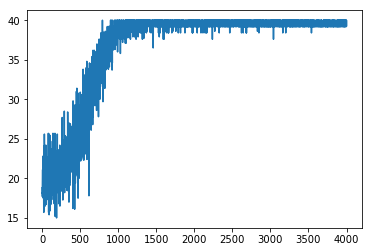

[[  1.00000000e+00   5.30649650e-19   1.32633338e-13]
 [  9.88393605e-01   1.16064167e-02   9.89933760e-11]
 [  9.99915779e-01   5.72341896e-10   8.42162772e-05]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


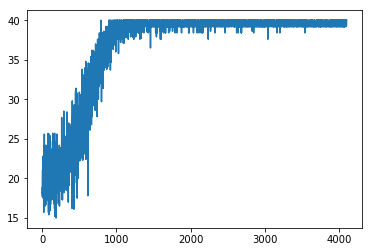

[[  1.00000000e+00   1.55957602e-19   5.89240909e-14]
 [  9.89049077e-01   1.09509230e-02   5.47472380e-11]
 [  9.99935806e-01   3.09548082e-10   6.42009109e-05]]
[0.20000000000000001, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


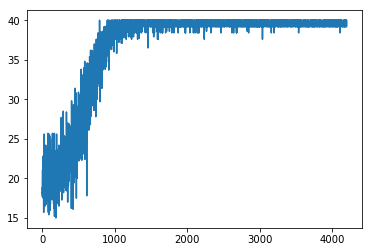

[[  1.00000000e+00   4.58358420e-20   2.61777989e-14]
 [  9.89716709e-01   1.02832960e-02   3.02051197e-11]
 [  9.99951065e-01   1.67416650e-10   4.89413505e-05]]
[0.29999999999999999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


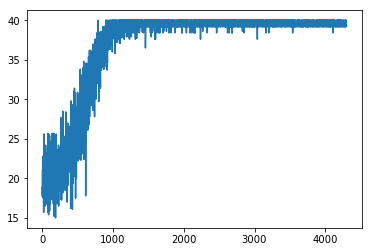

[[  1.00000000e+00   1.34711258e-20   1.16298064e-14]
 [  9.90403414e-01   9.59656760e-03   1.66133357e-11]
 [  9.99962687e-01   9.05456474e-11   3.73079383e-05]]
[0.20000000000000001, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


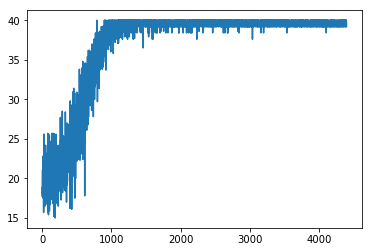

[[  1.00000000e+00   3.95915541e-21   5.16670320e-15]
 [  9.91091728e-01   8.90829321e-03   9.11336805e-12]
 [  9.99971569e-01   4.89705915e-11   2.84394519e-05]]
[0.29999999999999999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


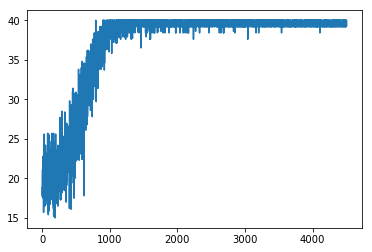

[[  1.00000000e+00   1.16359331e-21   2.29537967e-15]
 [  9.91773188e-01   8.22681002e-03   4.98629306e-12]
 [  9.99978304e-01   2.64851318e-11   2.16788649e-05]]
[0.20000000000000001, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


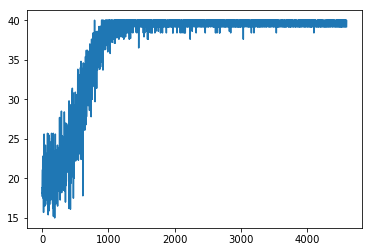

[[  1.00000000e+00   3.41979356e-22   1.01975048e-15]
 [  9.92430985e-01   7.56899500e-03   2.72306309e-12]
 [  9.99983490e-01   1.43241313e-11   1.65252914e-05]]
[0.29999999999999999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


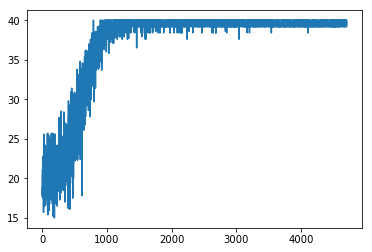

[[  1.00000000e+00   1.00507518e-22   4.53036578e-16]
 [  9.93061185e-01   6.93883514e-03   1.48440244e-12]
 [  9.99987423e-01   7.74700616e-12   1.25968154e-05]]
[0.20000000000000001, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


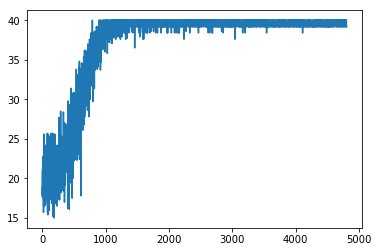

[[  1.00000000e+00   2.95390985e-23   2.01267800e-16]
 [  9.93621588e-01   6.37840386e-03   8.10247919e-13]
 [  9.99990404e-01   4.18985593e-12   9.60212674e-06]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


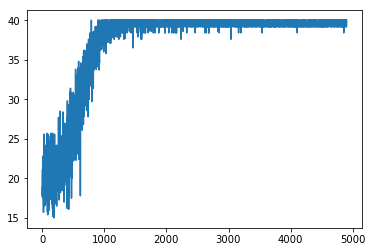

[[  1.00000000e+00   8.68152234e-24   8.94160206e-17]
 [  9.94108856e-01   5.89116896e-03   4.43302350e-13]
 [  9.99992669e-01   2.26602114e-12   7.31936416e-06]]
[0.29999999999999999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


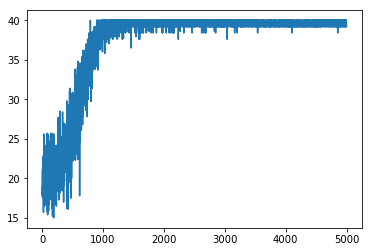

[[  1.00000000e+00   2.55149408e-24   3.97241578e-17]
 [  9.94577944e-01   5.42205805e-03   2.42112347e-13]
 [  9.99994397e-01   1.22554321e-12   5.57929116e-06]]
[0.29999999999999999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


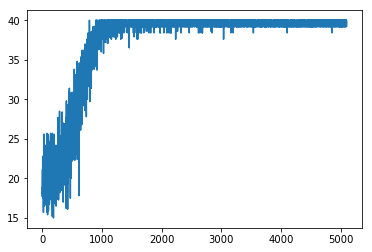

[[  1.00000000e+00   7.49882499e-25   1.76479430e-17]
 [  9.95023429e-01   4.97658551e-03   1.32047314e-13]
 [  9.99995768e-01   6.62816156e-13   4.25289409e-06]]
[0.20000000000000001, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


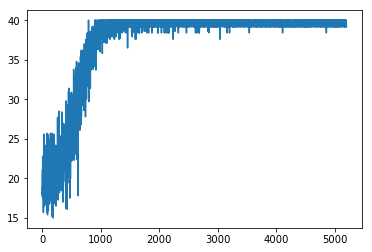

[[  1.00000000e+00   2.20390012e-25   7.84031398e-18]
 [  9.95443046e-01   4.55698092e-03   7.19322808e-14]
 [  9.99996781e-01   3.58449869e-13   3.24161169e-06]]
[0.29999999999999999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


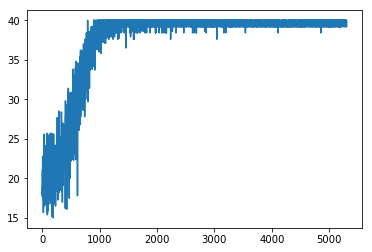

[[  1.00000000e+00   6.47724815e-26   3.48316864e-18]
 [  9.95834708e-01   4.16529272e-03   3.91495206e-14]
 [  9.99997556e-01   1.93843504e-13   2.47072740e-06]]
[0.29999999999999999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


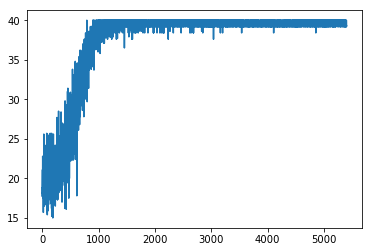

[[  1.00000000e+00   1.90365926e-26   1.54744596e-18]
 [  9.96201217e-01   3.79879866e-03   2.12832325e-14]
 [  9.99998093e-01   1.04827192e-13   1.88316596e-06]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


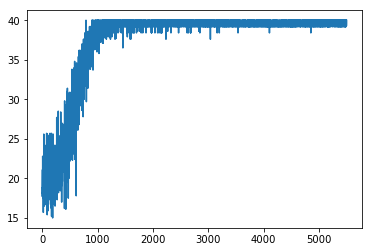

[[  1.00000000e+00   5.59484267e-27   6.87471772e-19]
 [  9.96543288e-01   3.45670851e-03   1.15572004e-14]
 [  9.99998569e-01   5.66887202e-14   1.43533191e-06]]
[0.20000000000000001, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


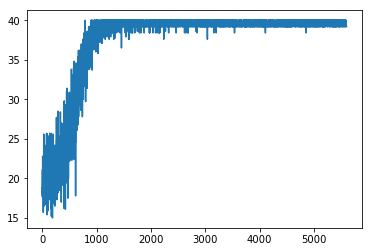

[[  1.00000000e+00   1.64432085e-27   3.05417726e-19]
 [  9.96860921e-01   3.13905114e-03   6.26935586e-15]
 [  9.99998927e-01   3.06562670e-14   1.09399673e-06]]
[0.20000000000000001, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


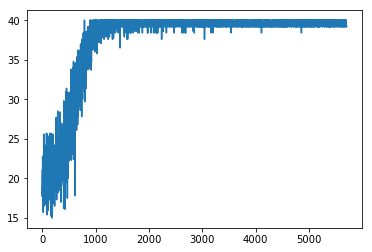

[[  1.00000000e+00   4.83264886e-28   1.35686068e-19]
 [  9.97154891e-01   2.84509221e-03   3.39757176e-15]
 [  9.99999166e-01   1.65783711e-14   8.33834122e-07]]
[0.20000000000000001, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


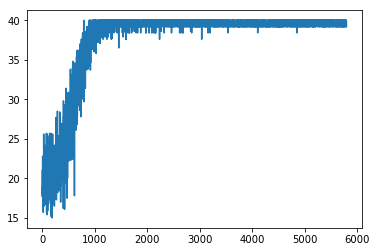

[[  1.00000000e+00   1.42031243e-28   6.02804252e-20]
 [  9.97426212e-01   2.57378095e-03   1.83948112e-15]
 [  9.99999344e-01   8.96530842e-15   6.35540573e-07]]
[0.29999999999999999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


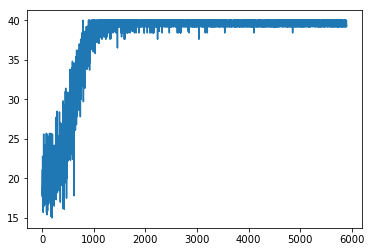

[[  1.00000000e+00   4.17428945e-29   2.67803148e-20]
 [  9.97676194e-01   2.32379371e-03   9.94936017e-16]
 [  9.99999523e-01   4.84828149e-15   4.84403074e-07]]
[0.20000000000000001, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


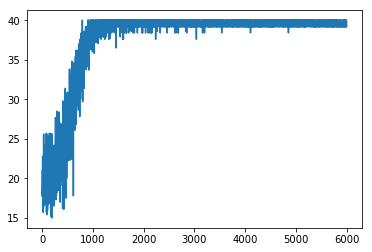

[[  1.00000000e+00   1.22682106e-29   1.18977540e-20]
 [  9.97893512e-01   2.10647285e-03   5.39204869e-16]
 [  9.99999642e-01   2.62186513e-15   3.69207442e-07]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


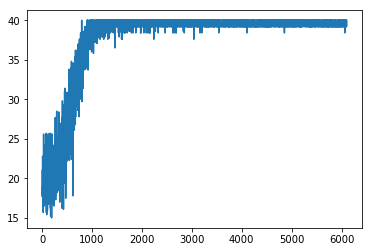

[[  1.00000000e+00   3.60561959e-30   5.28598461e-21]
 [  9.98073041e-01   1.92694191e-03   2.93547976e-16]
 [  9.99999702e-01   1.41785830e-15   2.81406415e-07]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


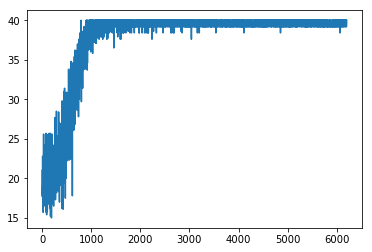

[[  1.00000000e+00   1.05968935e-30   2.34847966e-21]
 [  9.98239160e-01   1.76086114e-03   1.59726340e-16]
 [  9.99999762e-01   7.66752753e-16   2.14485311e-07]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


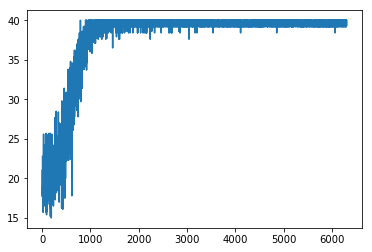

[[  1.00000000e+00   3.11442033e-31   1.04339252e-21]
 [  9.98392224e-01   1.60780188e-03   8.68758945e-17]
 [  9.99999821e-01   4.14646345e-16   1.63478674e-07]]
[0.29999999999999999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


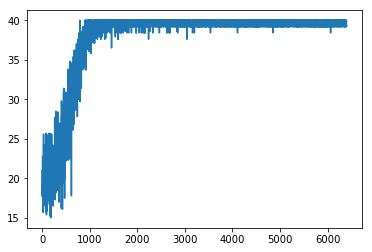

[[  1.00000000e+00   9.15326183e-32   4.63562840e-22]
 [  9.98533070e-01   1.46691094e-03   4.72328766e-17]
 [  9.99999881e-01   2.24233417e-16   1.24601897e-07]]
[0.29999999999999999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


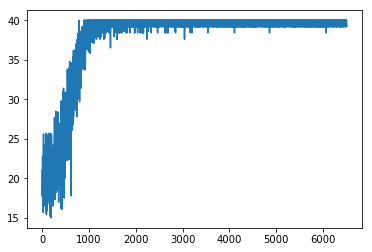

[[  1.00000000e+00   2.69013792e-32   2.05953659e-22]
 [  9.98662531e-01   1.33747177e-03   2.56712542e-17]
 [  9.99999881e-01   1.21261462e-16   9.49703818e-08]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


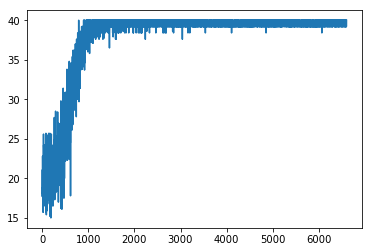

[[  1.00000000e+00   7.90629860e-33   9.15019643e-23]
 [  9.98781264e-01   1.21872954e-03   1.39481263e-17]
 [  9.99999940e-01   6.55760599e-17   7.23855251e-08]]
[0.20000000000000001, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


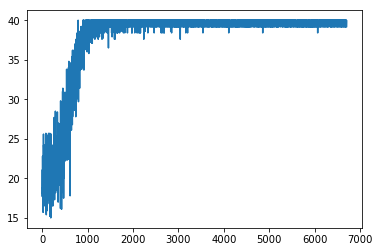

[[  1.00000000e+00   2.32365625e-33   4.06528834e-23]
 [  9.98876333e-01   1.12366932e-03   7.62316997e-18]
 [  9.99999940e-01   3.54623711e-17   5.51715615e-08]]
[0.20000000000000001, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


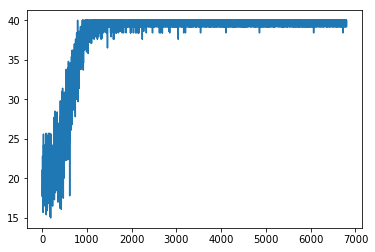

[[  1.00000000e+00   6.82921121e-34   1.80614343e-23]
 [  9.98961210e-01   1.03877450e-03   4.17183827e-18]
 [  9.99999940e-01   1.91774232e-17   4.20512372e-08]]
[0.20000000000000001, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


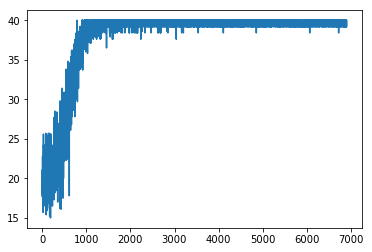

[[  1.00000000e+00   2.00710104e-34   8.02441067e-24]
 [  9.99040246e-01   9.59731289e-04   2.28239521e-18]
 [  9.99999940e-01   1.03708117e-17   3.20510551e-08]]
[0.20000000000000001, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


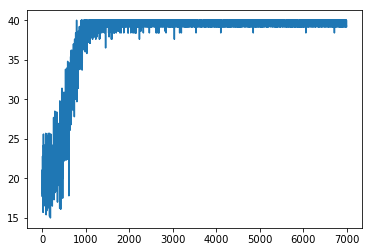

[[  1.00000000e+00   5.89885737e-35   3.56511920e-24]
 [  9.99113739e-01   8.86266702e-04   1.24837705e-18]
 [  1.00000000e+00   5.60835197e-18   2.44290117e-08]]
[0.20000000000000001, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


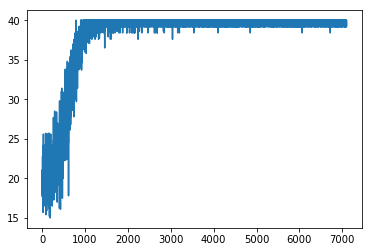

[[  1.00000000e+00   1.73367050e-35   1.58392630e-24]
 [  9.99182045e-01   8.17979628e-04   6.82622891e-19]
 [  1.00000000e+00   3.03289742e-18   1.86195592e-08]]
[0.29999999999999999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


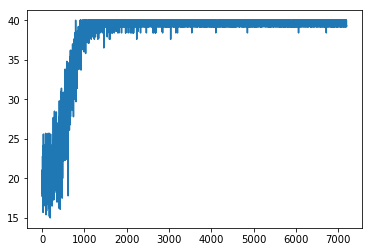

[[  1.00000000e+00   5.09524677e-36   7.03713478e-25]
 [  9.99245405e-01   7.54584675e-04   3.73170875e-19]
 [  1.00000000e+00   1.64013734e-18   1.41916514e-08]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


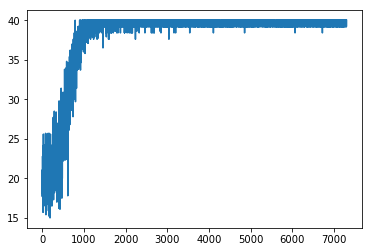

[[  1.00000000e+00   1.49748987e-36   3.12648823e-25]
 [  9.99304175e-01   6.95799768e-04   2.03958363e-19]
 [  1.00000000e+00   8.86957233e-19   1.08167422e-08]]
[0.20000000000000001, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


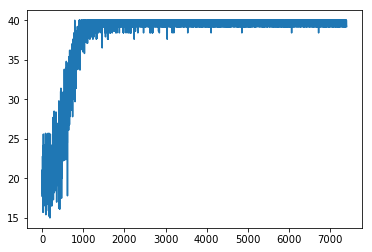

[[  1.00000000e+00   4.40111347e-37   1.38904945e-25]
 [  9.99358654e-01   6.41337829e-04   1.11451847e-19]
 [  1.00000000e+00   4.79650811e-19   8.24441759e-09]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


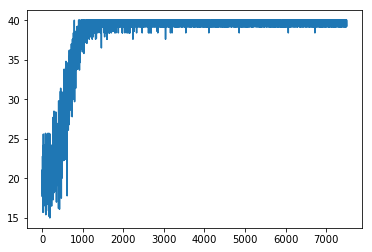

[[  1.00000000e+00   1.29348447e-37   6.17132789e-26]
 [  9.99409080e-01   5.90901880e-04   6.08898764e-20]
 [  1.00000000e+00   2.59386650e-19   6.28381702e-09]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


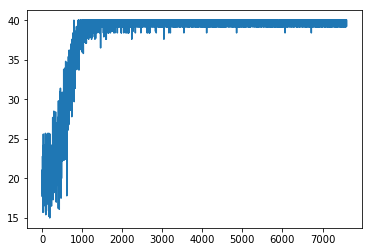

[[  1.00000000e+00   3.80154281e-38   2.74182351e-26]
 [  9.99455750e-01   5.44230919e-04   3.32600923e-20]
 [  1.00000000e+00   1.40271724e-19   4.78946571e-09]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


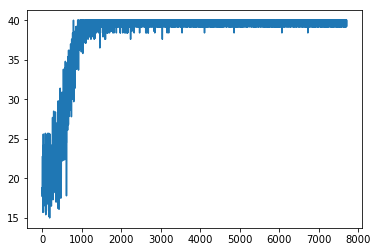

[[  1.00000000e+00   1.11727110e-38   1.21814900e-26]
 [  9.99498904e-01   5.01086120e-04   1.81646633e-20]
 [  1.00000000e+00   7.58564624e-20   3.65048525e-09]]
[0.20000000000000001, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


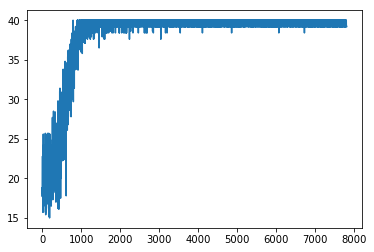

[[  1.00000000e+00   3.28365288e-39   5.41204418e-27]
 [  9.99538779e-01   4.61241463e-04   9.91931807e-21]
 [  1.00000000e+00   4.10218350e-20   2.78236501e-09]]
[0.29999999999999999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


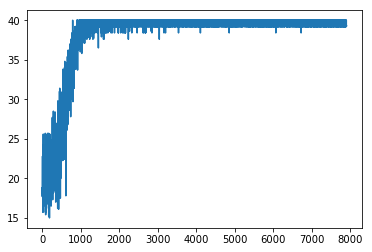

[[  1.00000000e+00   9.65063042e-40   2.40448598e-27]
 [  9.99575555e-01   4.24439902e-04   5.41579260e-21]
 [  1.00000000e+00   2.21838822e-20   2.12069229e-09]]
[0.20000000000000001, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


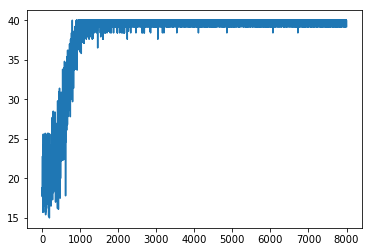

[[  1.00000000e+00   2.83631217e-40   1.06827521e-27]
 [  9.99609530e-01   3.90496483e-04   2.95665915e-21]
 [  1.00000000e+00   1.19966513e-20   1.61637148e-09]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


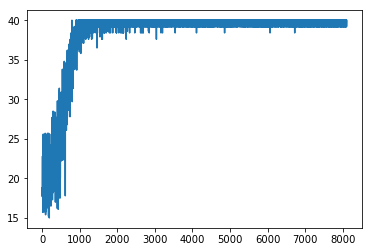

[[  1.00000000e+00   8.33590417e-41   4.74617846e-28]
 [  9.99640822e-01   3.59187135e-04   1.61397296e-21]
 [  1.00000000e+00   6.48757674e-21   1.23198296e-09]]
[0.20000000000000001, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


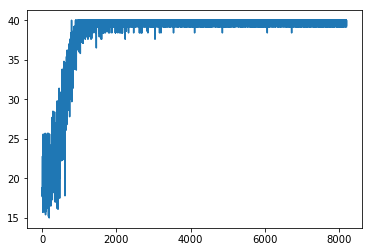

[[  1.00000000e+00   2.44989011e-41   2.10865231e-28]
 [  9.99669671e-01   3.30308569e-04   8.80904640e-22]
 [  1.00000000e+00   3.50836661e-21   9.39005651e-10]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


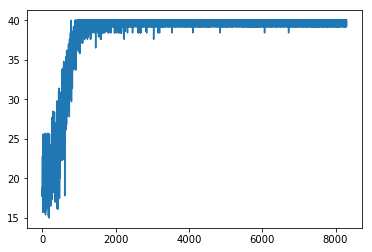

[[  1.00000000e+00   7.19987151e-42   9.36844547e-29]
 [  9.99696314e-01   3.03711160e-04   4.80771821e-22]
 [  1.00000000e+00   1.89726273e-21   7.15701221e-10]]
[0.29999999999999999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


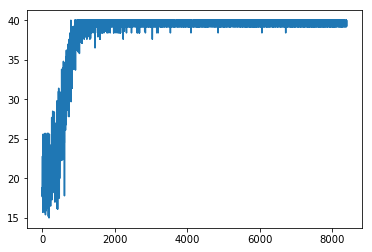

[[  1.00000000e+00   2.11596068e-42   4.16223674e-29]
 [  9.99720812e-01   2.79213069e-04   2.62371552e-22]
 [  1.00000000e+00   1.02600607e-21   5.45500645e-10]]
[0.20000000000000001, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


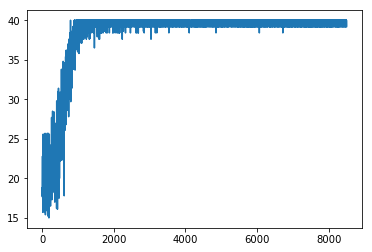

[[  1.00000000e+00   6.22176518e-43   1.84922316e-29]
 [  9.99743342e-01   2.56644271e-04   1.43166781e-22]
 [  1.00000000e+00   5.54845936e-22   4.15775414e-10]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


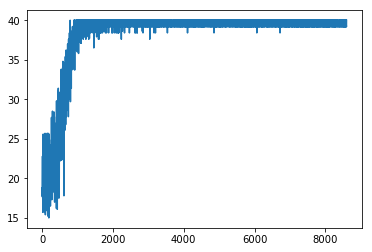

[[  1.00000000e+00   1.82168800e-43   8.21577565e-30]
 [  9.99764144e-01   2.35877276e-04   7.81208639e-23]
 [  1.00000000e+00   3.00050856e-22   3.16900062e-10]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


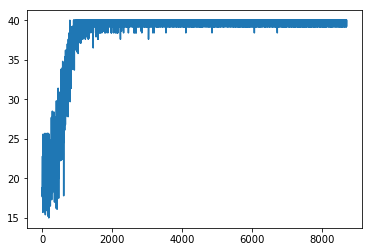

[[  1.00000000e+00   5.32493416e-44   3.65015371e-30]
 [  9.99783278e-01   2.16750617e-04   4.26217634e-23]
 [  1.00000000e+00   1.62262201e-22   2.41538234e-10]]
[0.29999999999999999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


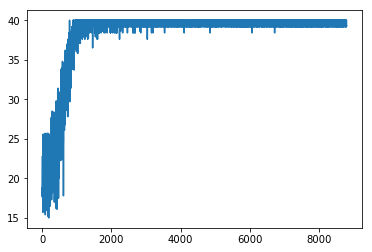

[[  1.00000000e+00   1.54142831e-44   1.62169959e-30]
 [  9.99800861e-01   1.99154078e-04   2.32526234e-23]
 [  1.00000000e+00   8.77485263e-23   1.84098140e-10]]
[0.29999999999999999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


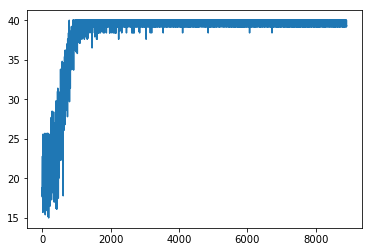

[[  1.00000000e+00   4.20389539e-45   7.20498339e-31]
 [  9.99817014e-01   1.82969248e-04   1.26856249e-23]
 [  1.00000000e+00   4.74528517e-23   1.40317855e-10]]
[0.20000000000000001, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


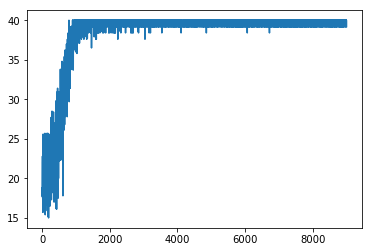

[[  1.00000000e+00   1.40129846e-45   3.20104815e-31]
 [  9.99831915e-01   1.68098704e-04   6.92071932e-24]
 [  1.00000000e+00   2.56616626e-23   1.06948936e-10]]
[0.20000000000000001, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


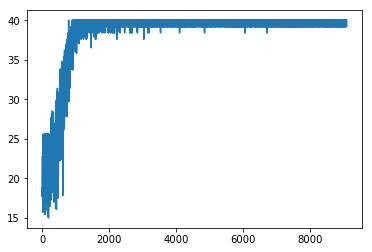

[[  1.00000000e+00   0.00000000e+00   1.42218077e-31]
 [  9.99845624e-01   1.54401365e-04   3.77503075e-24]
 [  1.00000000e+00   1.38773728e-23   8.15154610e-11]]
[0.20000000000000001, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


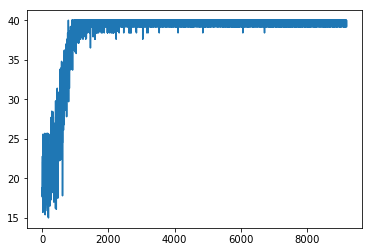

[[  1.00000000e+00   0.00000000e+00   6.31850078e-32]
 [  9.99858201e-01   1.41811732e-04   2.05909322e-24]
 [  1.00000000e+00   7.50463811e-24   6.21303078e-11]]
[0.29999999999999999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


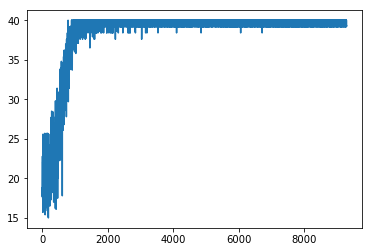

[[  1.00000000e+00   0.00000000e+00   2.80722098e-32]
 [  9.99869764e-01   1.30243774e-04   1.12313273e-24]
 [  1.00000000e+00   4.05837539e-24   4.73551302e-11]]
[0.20000000000000001, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


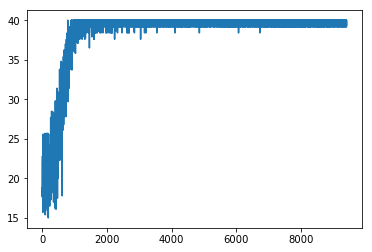

[[  1.00000000e+00   0.00000000e+00   1.24719921e-32]
 [  9.99880373e-01   1.19612261e-04   6.12612369e-25]
 [  1.00000000e+00   2.19469762e-24   3.60936316e-11]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


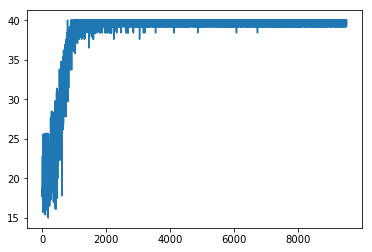

[[  1.00000000e+00   0.00000000e+00   5.54113086e-33]
 [  9.99890149e-01   1.09848486e-04   3.34148932e-25]
 [  1.00000000e+00   1.18685366e-24   2.75102215e-11]]
[0.29999999999999999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


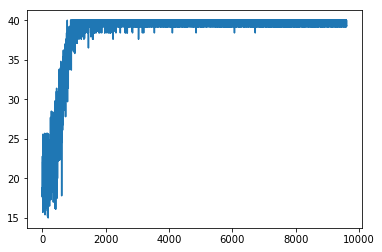

[[  1.00000000e+00   0.00000000e+00   2.46182772e-33]
 [  9.99899149e-01   1.00866630e-04   1.82241648e-25]
 [  1.00000000e+00   6.41829460e-25   2.09680294e-11]]
[0.20000000000000001, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


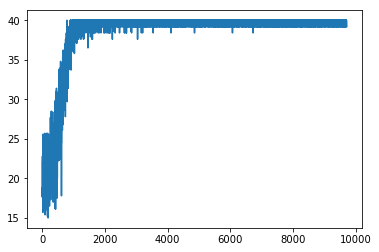

[[  1.00000000e+00   0.00000000e+00   1.09375543e-33]
 [  9.99907374e-01   9.26063876e-05   9.93844501e-26]
 [  1.00000000e+00   3.47090022e-25   1.59816327e-11]]
[0.29999999999999999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


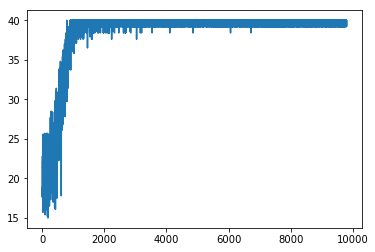

[[  1.00000000e+00   0.00000000e+00   4.85936462e-34]
 [  9.99915004e-01   8.50225551e-05   5.41987070e-26]
 [  1.00000000e+00   1.87700146e-25   1.21810487e-11]]
[0.20000000000000001, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


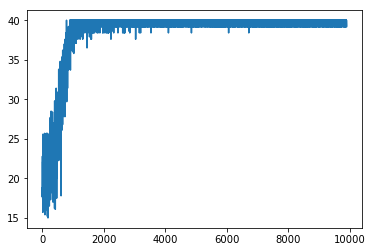

[[  1.00000000e+00   0.00000000e+00   2.15860137e-34]
 [  9.99921918e-01   7.80597256e-05   2.95569202e-26]
 [  1.00000000e+00   1.01504921e-25   9.28427994e-12]]
[0.29999999999999999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


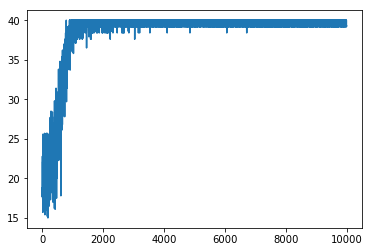

In [4]:
import torch

import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.t_policy=torch.autograd.Variable(torch.FloatTensor([[1/3 for x in range(3)] for y in range(3)]), requires_grad=True)
    def forward(self):
        policy = torch.nn.functional.log_softmax(self.t_policy)
        
        return policy

def gt(rewardlist, gamma=0.1):
    '''
    Function um den " total discounted return from time-step t zu berechnen
    >>> gt([10, 2, 3], gamma=0.1)
    10.23
    '''
    summe=0
    for i, value in enumerate(rewardlist):
        summe+=(gamma**i)*value
    return summe

valuelist=[] 
rewards=np.array([10., 2., 3.])/10
model = Model()
optim = torch.optim.SGD([model.t_policy], lr=0.0001)
for i in range(10001): 
    poli=torch.nn.functional.softmax(model.t_policy).data.numpy()
    state_action_list=[] 
    start_state=random.randint(0, 2)
    next_state=start_state
    rewardlist=[] 

    for k in range(40):
        rewardlist.append(rewards[next_state])
        action=np.random.choice(np.arange(0, 3), p=poli[next_state])
        state_action_list.append((next_state, action)) 
        next_state=action 


    rew=gt(rewardlist[:], 0.99)
    grad_list = []
    for j, (state, action) in enumerate(state_action_list):
        value = model()
        value = -value[state, action] * rew
        grad_list.append(value.view(1, -1))

    grads = torch.cat(grad_list, 0).mean()
    grads.backward()
    optim.step()
    value=(gt(rewardlist, 1))
    valuelist.append(value)


    if i%100==0:
        print(poli)
        print(rewardlist)
        plt.plot(valuelist)
        plt.show()

# Value Iteration



In [3]:
import numpy as np

rewards=np.array([10., 2., 3.])

state_value_function=np.array([0 for i in range(3)])

for i in range(1000):
    s_v_f=state_value_function.copy()
    for s in range(3):
        state_value_function[s]=max(rewards[s]+0.1*state_value_function[s_prime] for s_prime  in range(3))
    print(state_value_function)

[10  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]
[11  3  4]

# Policy Gradient for the CartPole task

env.action_space Discrete(2)
env.observation_space Box(4,)
env.observation_space.high [  4.80000000e+00   3.40282347e+38   4.18879020e-01   3.40282347e+38]
env.observation_space.low [ -4.80000000e+00  -3.40282347e+38  -4.18879020e-01  -3.40282347e+38]


/home/michael/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:35: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


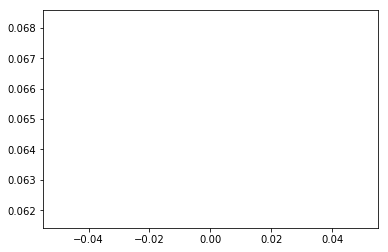

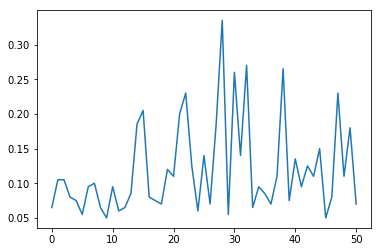

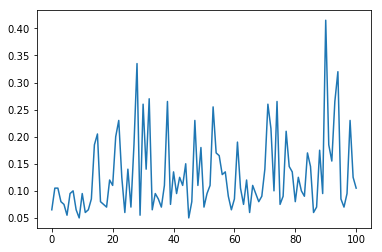

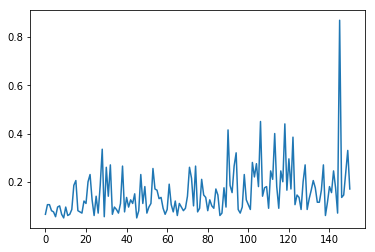

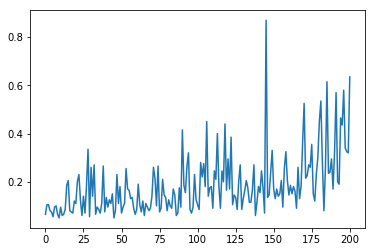

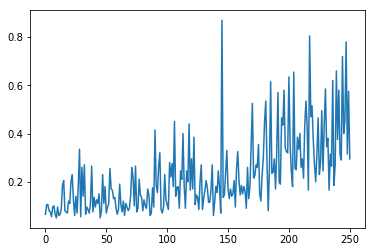

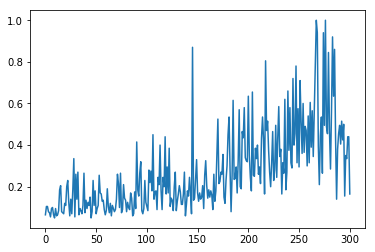

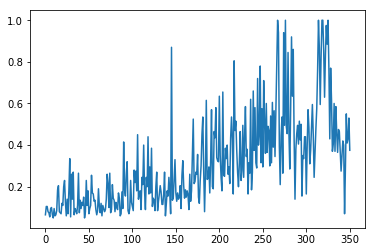

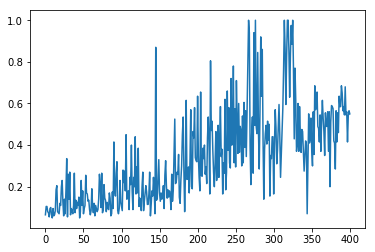

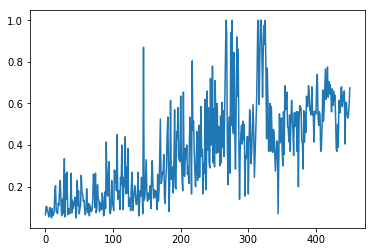

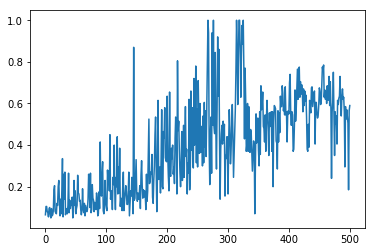

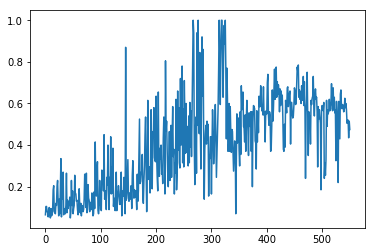

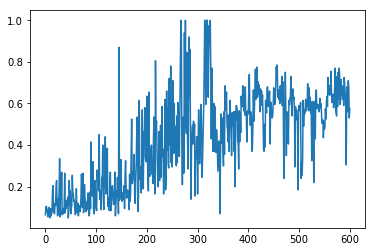

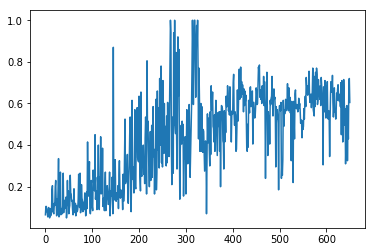

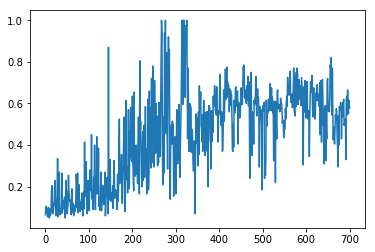

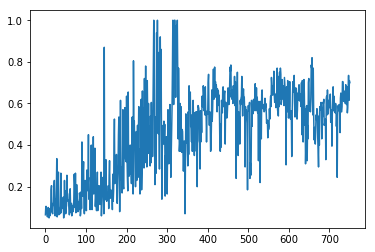

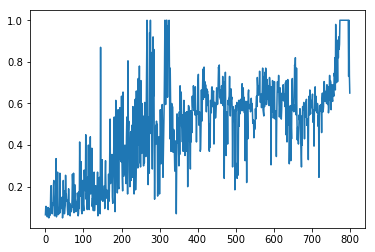

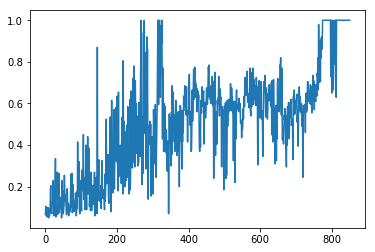

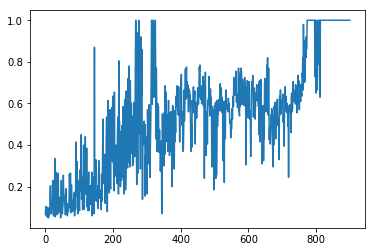

KeyboardInterrupt: 

In [1]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import gym
import random

env = gym.make('CartPole-v0')
env.seed(1)

print("env.action_space", env.action_space)
print("env.observation_space", env.observation_space)
print("env.observation_space.high", env.observation_space.high)
print("env.observation_space.low", env.observation_space.low)


RENDER_ENV = False
EPISODES = 5000
rewards = []
RENDER_REWARD_MIN = 50

import numpy as np
class PolicyGradient(nn.Module):
    def __init__(self):
        super(PolicyGradient, self).__init__()
        self.linear = nn.Linear(4, 8)
        self.linear2 = nn.Linear(8, 2)
    def forward(self, state):
        input1 = torch.autograd.Variable(torch.FloatTensor([state]))
        return F.log_softmax(self.linear2(F.sigmoid(self.linear(input1))))
    
criterion = torch.nn.NLLLoss()
policy = PolicyGradient()
optimizer = torch.optim.RMSprop(policy.parameters(), lr=0.002)
env.reset()
decay=1
import random
import numpy as np
import math
import matplotlib.pyplot as plt
resultlist=[]
for episode in range(EPISODES):
    observations = []
    observation = env.reset()
    while True:
        action = int(np.random.choice(range(2), p=np.exp(policy(observation).data.numpy()[0])))
        observation_, reward, finished, info = env.step(action)
        observations.append((observation, action, reward, observation_))
        observation=observation_
        if finished:
            rewardlist = [x[2] for x in observations]
            cumulative=0
            savelist=[]
            for rew in rewardlist[::-1]:
                cumulative=cumulative*decay + rew/200
                savelist.append(cumulative)
            savelist=savelist[::-1]
            resultlist.append(savelist[0])
            if episode%50==0:
                plt.plot(resultlist)
                plt.show()
            savelist=np.array(savelist)
            for (observation, action, reward, next_observation), cum_reward in zip(observations, savelist):
                action = torch.autograd.Variable(torch.LongTensor([action]))
                result = policy(observation)
                loss = criterion(result, action)
                (loss * cum_reward).backward()
                optimizer.step()
                optimizer.zero_grad()
            break

# Actor Critic for the CartPole task

/home/michael/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


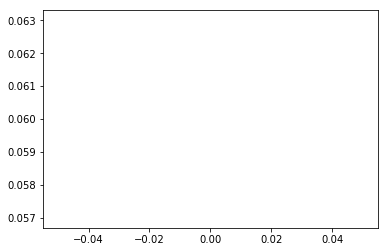

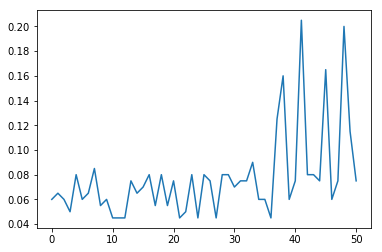

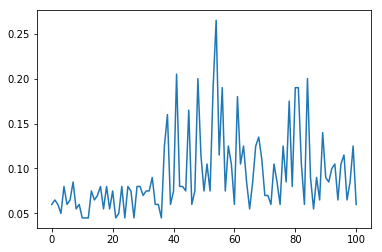

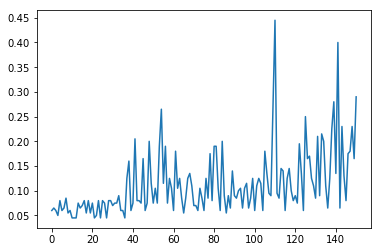

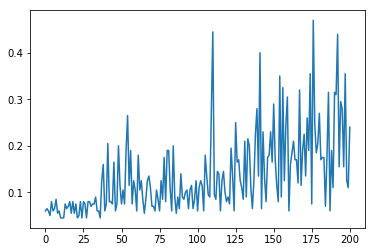

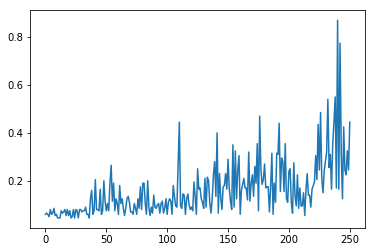

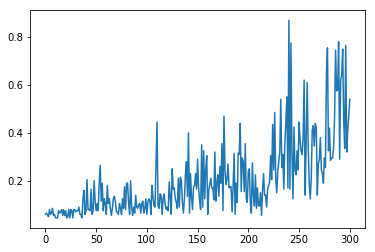

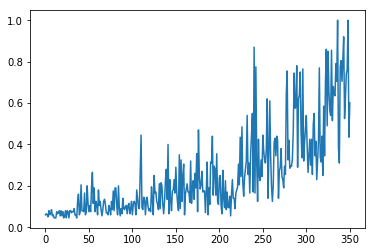

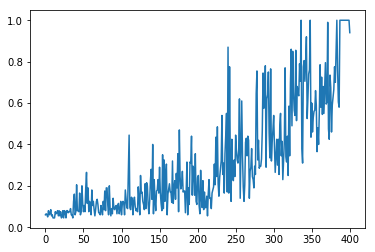

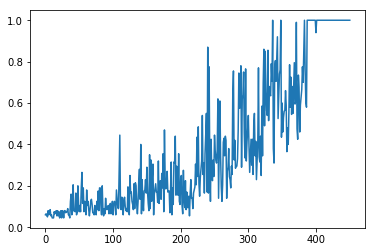

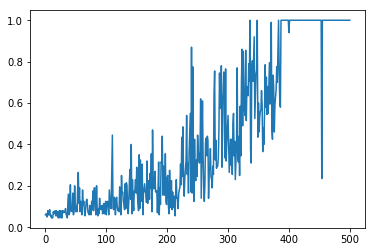

KeyboardInterrupt: 

In [2]:
import numpy as np
class PolicyGradient(nn.Module):
    def __init__(self):
        super(PolicyGradient, self).__init__()
        self.linear = nn.Linear(4, 8)
        self.linear2 = nn.Linear(8, 2)
    def forward(self, state):
        input1 = torch.autograd.Variable(torch.FloatTensor([state]))
        return F.log_softmax(self.linear2(F.sigmoid(self.linear(input1))))
    
class Critic(nn.Module):
    def __init__(self):
        super(Critic, self).__init__()
        self.linear = nn.Linear(4, 8)
        self.linear2 = nn.Linear(2, 4)
        self.linear3 = nn.Linear(12, 1)
        
    def forward(self, state, action):
        input1 = torch.autograd.Variable(torch.FloatTensor([state]))
        one_hot_action = np.zeros(2, dtype=np.float)
        one_hot_action[action] = 1.0
        input2 = torch.autograd.Variable(torch.FloatTensor([one_hot_action]))
        a1 = self.linear(input1)
        a2 = self.linear2(input2)
        a3 = torch.cat([a1, a2], 1)
        a4 = F.relu(a3)
        return (self.linear3(a4))
        
criterion = torch.nn.NLLLoss()
critic_loss = torch.nn.MSELoss()
policy = PolicyGradient()
critic = Critic()
optimizer = torch.optim.RMSprop(policy.parameters(), lr=0.002)
optimizer_critic = torch.optim.RMSprop(critic.parameters(), lr=0.002)
env.reset()
decay=1
import random
import numpy as np
import math
import matplotlib.pyplot as plt
resultlist=[]
for episode in range(EPISODES):
    observations = []
    observation = env.reset()
    while True:
        action = int(np.random.choice(range(2), p=np.exp(policy(observation).data.numpy()[0])))
        observation_, reward, finished, info = env.step(action)
        observations.append((observation, action, reward, observation_))
        observation=observation_
        if finished:
            rewardlist = [x[2] for x in observations]
            cumulative=0
            savelist=[]
            for rew in rewardlist[::-1]:
                cumulative=cumulative*decay + rew/200
                savelist.append(cumulative)
            savelist=savelist[::-1]

            resultlist.append(savelist[0])
            if episode%50==0:
                plt.plot(resultlist)
                plt.show()
            savelist=np.array(savelist)
            for (observation, action, reward, next_observation), cum_reward in zip(observations, savelist):
                crit_score = critic(observation, action)
                loss = critic_loss(crit_score, torch.autograd.Variable(torch.FloatTensor([cum_reward])).view(1, 1))
                loss.backward()
                optimizer.zero_grad()
                optimizer_critic.step()
                optimizer_critic.zero_grad()
                crit_score = float(critic(observation, action).data.numpy()[0][0])
                action = torch.autograd.Variable(torch.LongTensor([action]))
                result = policy(observation)
                loss = criterion(result, action)
                (loss * crit_score).backward()
                optimizer.step()
                optimizer.zero_grad()
            break